In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import PIL
import math, operator

In [2]:
img1 = Image.open('./images/img1.jpg')

In [3]:
img1_PIL_15 = img1.rotate(15,PIL.Image.NEAREST,expand = 1)

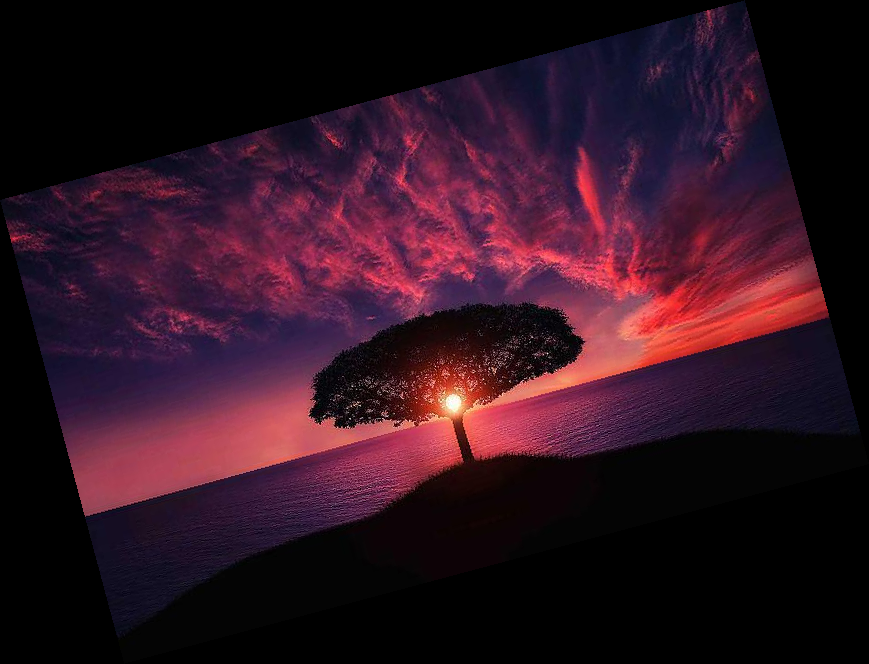

In [4]:
img1_PIL_15

In [5]:
img1_PIL_45 = img1.rotate(45,PIL.Image.NEAREST,expand = 1)

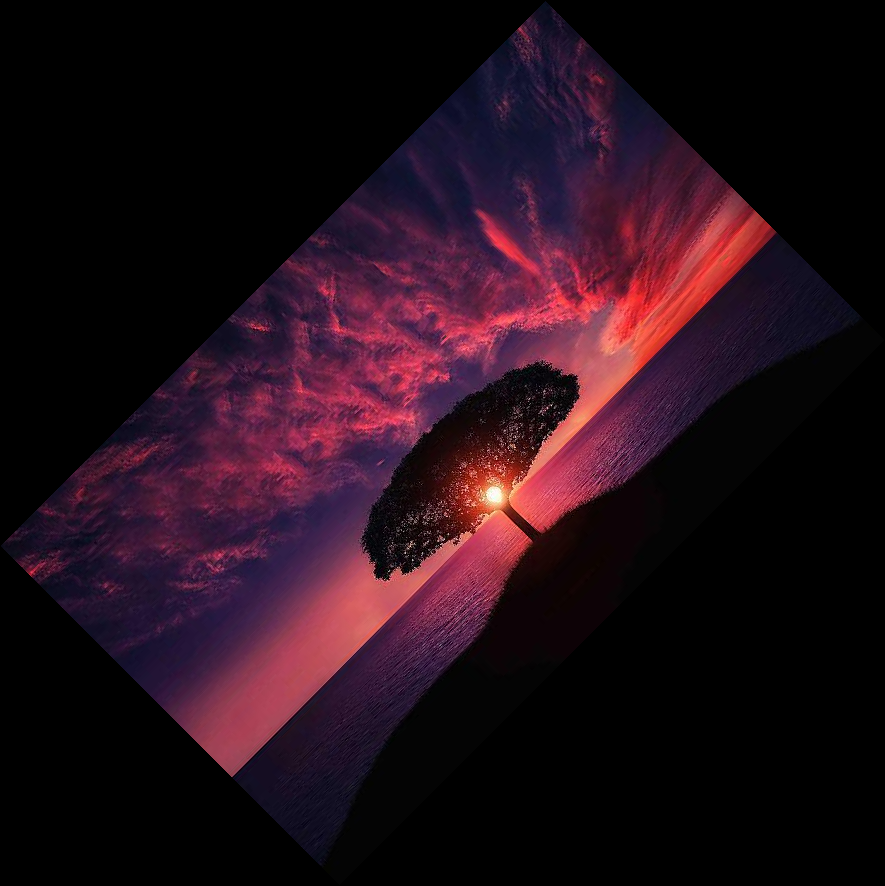

In [6]:
img1_PIL_45

In [7]:
img2 = cv2.imread('./images/img1.jpg')

In [8]:
height,width = img2.shape[0:2]
center = (width/2,height/2)

rotate = cv2.getRotationMatrix2D(center,10,1)
img2_CV2_15 = cv2.warpAffine(img2,rotate,(width,height))

In [9]:
cv2.imshow('img',img2_CV2_15)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
rotateAngle = cv2.getRotationMatrix2D(center,45,1)
img2_CV2_45 = cv2.warpAffine(img2,rotateAngle,(width,height))

In [11]:
cv2.imshow('img',img2_CV2_45)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
def rotate(image, angle):
    rad = math.radians(angle)
    rotImg = np.uint8(np.zeros(image.shape))
    
    centerx,centery = (rotImg.shape[1]//2, rotImg.shape[0]//2)
    
    i = j = 0
    one_imgx = 1 
    zero_imgy = 0
    for i in range(rotImg.shape[0]):
        for j in range(rotImg.shape[1]):
            x = round((i-centerx)*math.cos(rad)*one_imgx + (j-centery)*math.sin(rad)*one_imgx) + one_imgx*centerx
            
            y = -(i-centery)*math.sin(rad)*one_imgx + (j-centery)*math.cos(rad)*one_imgx
            y = round(y) + centery + zero_imgy
            
            if(x>=0 and y>=0 and x<image.shape[0] and y<image.shape[1]):
                rotImg[i,j,:] = image[x,y,:]
                
    return rotImg

In [13]:
rotate_img_15 = rotate(img2,15)
cv2.imshow('img',rotate_img_15)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
rotate_img_45 = rotate(img2,45)
cv2.imshow('img',rotate_img_45)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
def rmse(image1, image2):
    # Ensure that the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    # Calculate the mean squared error between the images
    mse = np.mean((image1 - image2) ** 2)
    # Take the square root of the mean squared error to get the root mean squared error
    rmse = np.sqrt(mse)
    return rmse

In [16]:
rmse(img2_CV2_15,rotate_img_15)

8.587802628002018

In [17]:
rmse(img2_CV2_45,rotate_img_45)

9.195441463936023

Text(0.5, 1.0, 'Rotated 45deg (part b)')

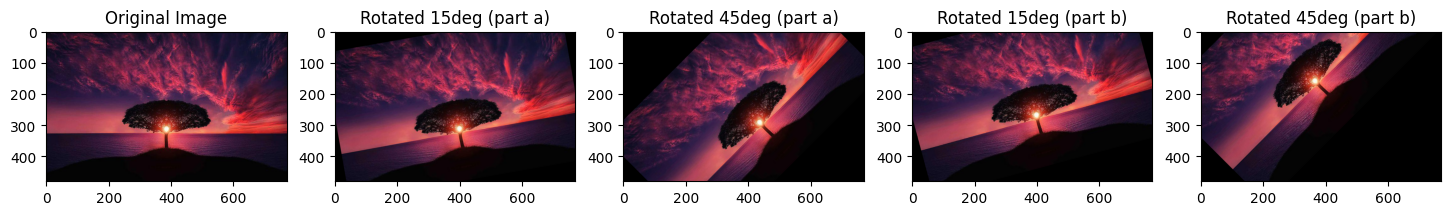

In [18]:
plt.figure(figsize=[18,5])
plt.subplot(151); plt.imshow(img2[...,::-1]); plt.title('Original Image')
plt.subplot(152); plt.imshow(img2_CV2_15[...,::-1]); plt.title('Rotated 15deg (part a)')
plt.subplot(153); plt.imshow(img2_CV2_45[...,::-1]); plt.title('Rotated 45deg (part a)')
plt.subplot(154); plt.imshow(rotate_img_15[...,::-1]); plt.title('Rotated 15deg (part b)')
plt.subplot(155); plt.imshow(rotate_img_45[...,::-1]); plt.title('Rotated 45deg (part b)')